**Spam or not a Spam mail classifier**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVxuaDZ7Oq_gKfKuzhUzuNiMqCh549yP5Gag&usqp=CAU)

This notebook has the machine learning algorithm to predict whether the mail is spam or not.

**Importing the libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import seaborn as sb

**loading the dataset from the csv file with the help of pandas**

In [46]:
df=pd.read_csv('spam.csv', encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [48]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**splitting the target and independent column **

In [49]:
x=df.v2
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [50]:
y=df.v1
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

**LabelEncoding**

In [51]:
y.replace(to_replace='ham',value=1,inplace=True)
y.replace(to_replace='spam',value=0,inplace=True)
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

**checking the ratio**

In [52]:
y=df.v1
y.value_counts()

1    4825
0     747
Name: v1, dtype: int64

<AxesSubplot: xlabel='v1', ylabel='Count'>

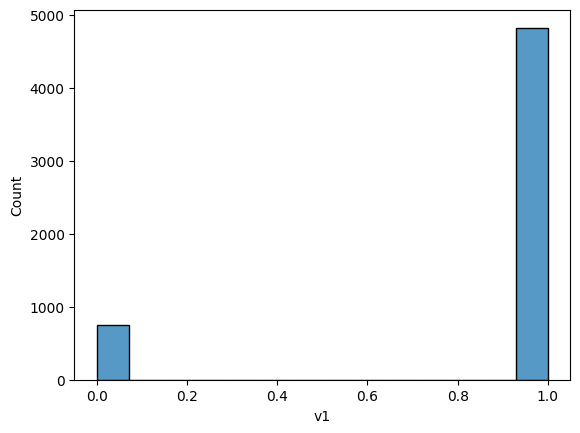

In [53]:
sb.histplot(y)

spam mail datas are very low compared to normal mails

**Splitting the data**

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=25)

**Oversampling with resample function**

In [55]:
gok= pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
spam = gok[gok.v1==0]
ham = gok[gok.v1==1]

In [56]:
assem=resample(spam,replace=True,n_samples=len(ham),random_state=25)

the minority data is also populated equally to majority

In [57]:
upsample=pd.concat([ham,assem])
upsample.v1.value_counts()

1    4350
0    4350
Name: v1, dtype: int64

**Splitting Again**

In [58]:
y_train=upsample.v1

x_train=upsample.v2

In [59]:
x_train

778     Happy New year my dear brother. I really do mi...
5444    Good morning. At the repair shop--the ONLY rea...
4114    Sorry. You never hear unless you book it. One ...
3229    I feel like a dick because I keep sleeping thr...
3180    So many people seems to be special at first si...
                              ...                        
3569    Customer Loyalty Offer:The NEW Nokia6650 Mobil...
3817    74355 XMAS iscoming & ur awarded either å£500 ...
4504    Mobile Club: Choose any of the top quality ite...
269     Ringtone Club: Get the UK singles chart on you...
1141    I don't know u and u don't know me. Send CHAT ...
Name: v2, Length: 8700, dtype: object

In [60]:
y_train

778     1
5444    1
4114    1
3229    1
3180    1
       ..
3569    0
3817    0
4504    0
269     0
1141    0
Name: v1, Length: 8700, dtype: int64

<AxesSubplot: xlabel='v1', ylabel='Count'>

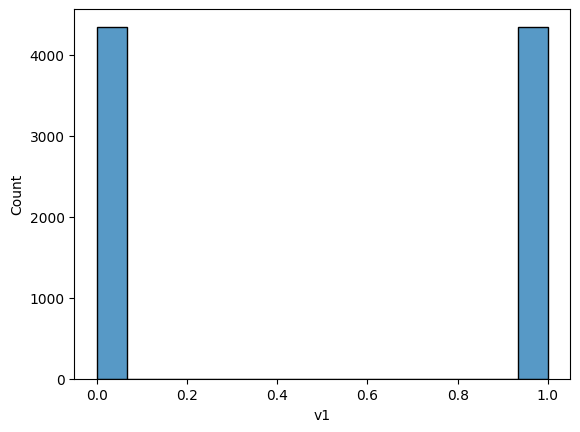

In [61]:
sb.histplot(y_train)

**Using TfidVectorizer**

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
tf=vect.fit_transform(x_train)
tt=vect.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [63]:
print(tf)

  (0, 797)	0.33000758327063073
  (0, 3459)	0.32652568205299265
  (0, 7736)	0.3379386699249172
  (0, 6994)	0.15208300400828778
  (0, 6185)	0.1639350254736377
  (0, 2293)	0.3233019450508517
  (0, 4993)	0.20550029182466722
  (0, 3318)	0.19951072808917758
  (0, 3999)	0.1517807057616126
  (0, 4653)	0.2414021141547977
  (0, 5770)	0.24433584646528864
  (0, 1575)	0.2947316788274748
  (0, 2283)	0.21984797548492044
  (0, 7875)	0.2565142595274912
  (0, 4899)	0.17293069466627584
  (0, 3460)	0.2485831728732047
  (1, 3627)	0.4034441986062273
  (1, 5774)	0.45402585129335565
  (1, 6289)	0.37501535973522
  (1, 5873)	0.542719337184543
  (1, 4732)	0.3513362029921707
  (1, 3302)	0.26921251539258134
  (2, 4332)	0.21539968836290557
  (2, 1732)	0.3268985733001604
  (2, 4243)	0.15390445290859622
  :	:
  (8698, 1788)	0.2877124773647757
  (8698, 7320)	0.19748554166440094
  (8698, 1866)	0.2735313238216894
  (8698, 4690)	0.17196853286446553
  (8698, 4598)	0.2193356961307
  (8698, 5676)	0.34645544190820377
  (8698

**Sample data for predicting**

In [64]:
mail=[
    'sorry but if u miss this offer,this will be others briyani,Enjoy it buy ordering now',
    'free,shop now',
    'Free entry in 2 a wkly comp to win FA Cup ',
    'your file has been found',
    'enjoy swiggy for free',
    'Nah I dont think he goes to usf, he lives around here though'
]

mail=vect.transform(mail)
print(mail)

  (0, 6506)	0.42271235927006284
  (0, 5037)	0.418821286614165
  (0, 4653)	0.4610834396734566
  (0, 2711)	0.4525101700259577
  (0, 1629)	0.4780581542879124
  (1, 6289)	0.8933602040575118
  (1, 3101)	0.44934123537276305
  (2, 7750)	0.3725769658300088
  (2, 7712)	0.27726132236812095
  (2, 3101)	0.20728081657474287
  (2, 2856)	0.5163706019217881
  (2, 2729)	0.3557875440309929
  (2, 2201)	0.4331008635312039
  (2, 1989)	0.40068378270594257
  (3, 2959)	1.0
  (4, 3101)	0.4969001371840875
  (4, 2711)	0.8678077285127362
  (5, 7420)	0.4457503276424324
  (5, 7047)	0.29923959511221193
  (5, 4822)	0.4457503276424324
  (5, 4291)	0.5212271067677959
  (5, 3284)	0.4004300580397727
  (5, 2516)	0.28468759600506793


**Using Logistic regression model for training**

In [65]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()

mod.fit(tf,y_train)

LogisticRegression()

In [66]:
mod.predict(tt)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

**Predicting accuracy score**

In [67]:
mod.score(tt,y_test)

0.9874551971326165

In [68]:
mod.predict(mail)

array([1, 0, 0, 1, 0, 1])

In [69]:
k= ['sorry but if u miss this offer,this will be others briyani,Enjoy it buy ordering now']

k = vect.transform(k)
classification = mod.predict(k)


In [70]:
print(classification)

[1]


**Predicting given data**

In [71]:
mod.predict(mail)

array([1, 0, 0, 1, 0, 1])

thus the model works and predicts the spam mail with an accuracy score of 98%

In [72]:
print(type(mod))

# save model 


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [73]:
import pickle

model = mod

# Save the model to a file
with open('model_1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [74]:
import joblib

model_1 = joblib.load('model_1.pkl')




In [75]:
print(type(model_1))





<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [76]:
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']